<a href="https://colab.research.google.com/github/RientArlCroud/challenge3-analisis-de-datos/blob/main/Challenge_3_An%C3%A1lisis_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Challenge 2 – Análisis de Datos | Oracle ONE Alura – G9

## 📌 Contexto
Este cuaderno de colab es parte del segundo challenge del programa **Oracle ONE - Alura Latam**, el objetivo principal es aplicar el proceso de ETL sobre un conjunto de datos de la empresa de TelecomX y desarrollar un reporte basado en los datos procesados.


In [2]:
import pandas as pd

## 📥 Extracción

In [3]:
df = pd.read_json('/content/TelecomX_Data.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


* Debemos normalizar 4 columnas, utilizando el método de pandas pd.json_normalize()
* Este método entrega un DF por aparte con los datos de la columna normalizada, estos serán agregados al DF original utilizando el método .concat(), en esa misma línea de código aprovecharemos para dropear la columna que ya normalizamos.
* En el desarrollo de la normalización hemos decidido agregar como prefijo a cada nueva columna, el nombre de la columna a la que pertenecía, para nombrar un ejemplo en la columna 'customer' la primera key es 'gender', que se mantendrá por ahora como 'customer_gender'

In [4]:
df_customer = pd.json_normalize(df['customer'])
df_customer = df_customer.add_prefix('customer_')
df_customer

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
df = pd.concat([df, df_customer], axis=1)
df = df.drop(columns=['customer'])
df

,customerID,Churn,phone,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


In [6]:
df_phone = pd.json_normalize(df['phone'])
df_phone = df_phone.add_prefix('phone_')
df_phone

,phone_PhoneService,phone_MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [7]:
df = pd.concat([df, df_phone], axis=1)
df = df.drop(columns=['phone'])
df

,customerID,Churn,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No


In [8]:
df_internet = pd.json_normalize(df['internet'])
df_internet = df_internet.add_prefix('internet_')
df_internet

,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [9]:
df = pd.concat([df, df_internet], axis=1)
df = df.drop(columns=['internet'])
df

,customerID,Churn,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,"{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [10]:
df_account = pd.json_normalize(df['account'])
df_account = df_account.add_prefix('account_')
df_account

,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [11]:
df = pd.concat([df, df_account], axis=1)
df = df.drop(columns=['account'])
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## 🔄 Transformacion

* Conociendo el conjunto de datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [13]:
df.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


* Comprabación de incoherencia en los datos

In [14]:
df['phone_MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [15]:
df['account_PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [16]:
df['account_Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [17]:
df['internet_InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [18]:
df['customerID'].value_counts().sum()

np.int64(7267)

* Manejo de incosistencias

En el proceso de manera incosistencias luego de algunas pruebas realizadas al tratar de convertir los datos de la columna que contiene el total, notamos que existen valores string ' ' (vacios) que deben ser convertidos a nan para poder ejecutar el código que convierte a float64, sin embargo al analizar esas casillas que son vacias notamos que corresponden a clientes que aún no han completado un mes con el servicio, por lo que declaramos que estos valores no serán nan sino 0

In [19]:
pd.set_option('display.max_columns', None)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [20]:
df.sample(20)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
1945,2754-SDJRD,No,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55
837,1193-RTSLK,Yes,Female,0,No,No,38,Yes,No,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.90,3233.6
6474,8898-KASCD,No,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15
5794,7924-GJZFI,No,Female,1,Yes,No,25,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.30,1813.1
4872,6661-HBGWL,Yes,Female,1,No,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.75,4323.45
1229,1757-TCATG,No,Male,0,Yes,Yes,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.05,746.75
1016,1428-IEDPR,No,Male,0,No,No,52,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,109.30,5731.4
6916,9526-MJRPO,,Female,1,Yes,No,27,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.30,2867.75
4608,6319-QSUSR,No,Female,0,No,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,216.2
1214,1732-FEKLD,No,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),94.75,5121.75


In [21]:
display(df[df['account_Charges.Total'] == ' '])

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [22]:
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'].str.strip(), errors='coerce')

In [23]:
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0)

In [24]:
df['account_Charges.Total'].isnull().sum()

np.int64(0)

Vamos a proceder a limpiar los nombres de las columnas para tener un mejor ambiente a la hora de trabajar

In [25]:
df.columns = (
    df.columns
    .str.replace('.', '_', regex=False)
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.lower()
)
df.columns

Index(['customer_id', 'churn', 'customer_gender', 'customer_senior_citizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phone_service', 'phone_multiple_lines',
       'internet_internet_service', 'internet_online_security',
       'internet_online_backup', 'internet_device_protection',
       'internet_tech_support', 'internet_streaming_tv',
       'internet_streaming_movies', 'account_contract',
       'account_paperless_billing', 'account_payment_method',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

Revisando si los ID deben ser corregidos

In [26]:
df['customer_id'].str.len().value_counts()

,count
customer_id,
10,7267


Aquí podemos ver que todos los string de los códigos son igual ya que poseen la misma cantidad de caracteres, no hay espacios vacios y por ende no deben ser limpiados

* Columna de cuentas diarias (opcional)

In [27]:
df['cuentas_diarias'] = df['account_charges_monthly'] / 30
df['cuentas_diarias']

,cuentas_diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


## 📤📊 Carga y Análisis

### * Análisis descriptivo

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7267 non-null   object 
 1   churn                       7267 non-null   object 
 2   customer_gender             7267 non-null   object 
 3   customer_senior_citizen     7267 non-null   int64  
 4   customer_partner            7267 non-null   object 
 5   customer_dependents         7267 non-null   object 
 6   customer_tenure             7267 non-null   int64  
 7   phone_phone_service         7267 non-null   object 
 8   phone_multiple_lines        7267 non-null   object 
 9   internet_internet_service   7267 non-null   object 
 10  internet_online_security    7267 non-null   object 
 11  internet_online_backup      7267 non-null   object 
 12  internet_device_protection  7267 non-null   object 
 13  internet_tech_support       7267 

In [29]:
df.describe()

,customer_senior_citizen,customer_tenure,account_charges_monthly,account_charges_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


### * Distribución de evasión

In [30]:
df['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [31]:
df['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [32]:
df[df['churn'] == '']

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,2.633333
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,0.663333
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1.958333
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,1.996667
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,3.438333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,1.808333
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1.355000
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,2.541667
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,0.641667


In [33]:
import numpy as np
df.loc[df['churn'] == '', 'churn'] = np.nan

<Axes: xlabel='churn'>

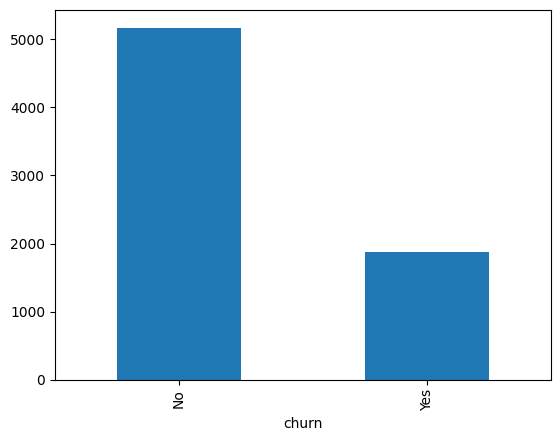

In [34]:
df['churn'].value_counts().plot(kind='bar')

### * Recuento de evasión por variables catégoricas

####**Evasión & Género**


In [35]:
df.groupby('churn')[['customer_gender']].value_counts()

churn  customer_gender
No     Male               2625
       Female             2549
Yes    Female              939
       Male                930
Name: count, dtype: int64

Conteo

In [36]:
conteo = df.groupby('customer_gender')['churn'].value_counts().reset_index(name='count')
conteo

,customer_gender,churn,count
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


Porcentajes

In [37]:
porcentajes = df.groupby('customer_gender')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes

,customer_gender,churn,percentage
0,Female,No,73.08
1,Female,Yes,26.92
2,Male,No,73.84
3,Male,Yes,26.16


Combinados

In [38]:
churn_by_gender = conteo.merge(
    porcentajes,
    on=['customer_gender', 'churn']
)
churn_by_gender

,customer_gender,churn,count,percentage
0,Female,No,2549,73.08
1,Female,Yes,939,26.92
2,Male,No,2625,73.84
3,Male,Yes,930,26.16


#### **Evasión & Adulto mayor**





In [39]:
df.groupby('churn')['customer_senior_citizen'].value_counts()

churn  customer_senior_citizen
No     0                          4508
       1                           666
Yes    0                          1393
       1                           476
Name: count, dtype: int64

Conteo

In [40]:
conteo_1 = df.groupby('customer_senior_citizen')['churn'].value_counts().reset_index(name='count')
conteo_1

,customer_senior_citizen,churn,count
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


Porcentajes

In [41]:
porcentajes_1 = df.groupby('customer_senior_citizen')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_1

,customer_senior_citizen,churn,percentage
0,0,No,76.39
1,0,Yes,23.61
2,1,No,58.32
3,1,Yes,41.68


Combinados

In [42]:
churn_by_senior_citizen = conteo_1.merge(
    porcentajes_1,
    on=['customer_senior_citizen', 'churn']
)
churn_by_senior_citizen

,customer_senior_citizen,churn,count,percentage
0,0,No,4508,76.39
1,0,Yes,1393,23.61
2,1,No,666,58.32
3,1,Yes,476,41.68


#### **Evasión & Tener dependientes**

In [43]:
df.groupby('churn')[['customer_dependents']].value_counts()

churn  customer_dependents
No     No                     3390
       Yes                    1784
Yes    No                     1543
       Yes                     326
Name: count, dtype: int64

Conteo

In [44]:
conteo_2 = df.groupby('customer_dependents')['churn'].value_counts().reset_index(name='count')
conteo_2

,customer_dependents,churn,count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


Porcentajes

In [45]:
porcentajes_2 = df.groupby('customer_dependents')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_2

,customer_dependents,churn,percentage
0,No,No,68.72
1,No,Yes,31.28
2,Yes,No,84.55
3,Yes,Yes,15.45


Combinados

In [46]:
churn_by_dependents = conteo_2.merge(
    porcentajes_2,
    on=['customer_dependents', 'churn']
)
churn_by_dependents


,customer_dependents,churn,count,percentage
0,No,No,3390,68.72
1,No,Yes,1543,31.28
2,Yes,No,1784,84.55
3,Yes,Yes,326,15.45


#### **Evasión & Tipo de contrato**


In [47]:
df.groupby('churn')[['account_contract']].value_counts()

churn  account_contract
No     Month-to-month      2220
       Two year            1647
       One year            1307
Yes    Month-to-month      1655
       One year             166
       Two year              48
Name: count, dtype: int64

Conteo

In [48]:
conteo_3 = df.groupby('account_contract')['churn'].value_counts().reset_index(name='count')
conteo_3

,account_contract,churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


Porcentajes

In [49]:
porcentajes_3 = df.groupby('account_contract')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_3

,account_contract,churn,percentage
0,Month-to-month,No,57.29
1,Month-to-month,Yes,42.71
2,One year,No,88.73
3,One year,Yes,11.27
4,Two year,No,97.17
5,Two year,Yes,2.83


Combinados

In [50]:
churn_by_contract = conteo_3.merge(
    porcentajes_3,
    on=['account_contract', 'churn']
)
churn_by_contract

,account_contract,churn,count,percentage
0,Month-to-month,No,2220,57.29
1,Month-to-month,Yes,1655,42.71
2,One year,No,1307,88.73
3,One year,Yes,166,11.27
4,Two year,No,1647,97.17
5,Two year,Yes,48,2.83


#### **Evasión & Método de pago**

In [51]:
df.groupby('churn')[['account_payment_method']].value_counts()

churn  account_payment_method   
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64

Conteo

In [52]:
conteo_4 = df.groupby('account_payment_method')['churn'].value_counts().reset_index(name='count')
conteo_4

,account_payment_method,churn,count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


Porcentajes

In [53]:
porcentajes_4 = df.groupby('account_payment_method')['churn'].value_counts(normalize=True).multiply(100).round(2).reset_index(name='percentage')
porcentajes_4

,account_payment_method,churn,percentage
0,Bank transfer (automatic),No,83.29
1,Bank transfer (automatic),Yes,16.71
2,Credit card (automatic),No,84.76
3,Credit card (automatic),Yes,15.24
4,Electronic check,No,54.71
5,Electronic check,Yes,45.29
6,Mailed check,No,80.89
7,Mailed check,Yes,19.11


Combinados

In [54]:
churn_by_payment = conteo_4.merge(
    porcentajes_4,
    on=['account_payment_method', 'churn']
)
churn_by_payment


,account_payment_method,churn,count,percentage
0,Bank transfer (automatic),No,1286,83.29
1,Bank transfer (automatic),Yes,258,16.71
2,Credit card (automatic),No,1290,84.76
3,Credit card (automatic),Yes,232,15.24
4,Electronic check,No,1294,54.71
5,Electronic check,Yes,1071,45.29
6,Mailed check,No,1304,80.89
7,Mailed check,Yes,308,19.11


### * Conteo de evasión por variables numéricas

In [55]:
df

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


Tenure

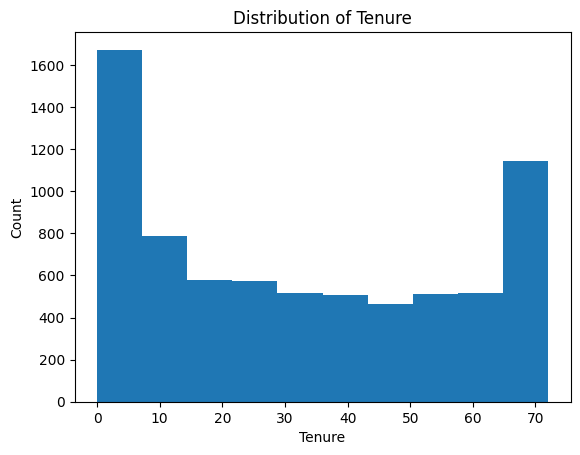

In [56]:
import matplotlib.pyplot as plt

plt.hist(df['customer_tenure'])
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')
plt.show()

In [57]:
df['customer_tenure'].describe()

,customer_tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


<Axes: xlabel='churn', ylabel='customer_tenure'>

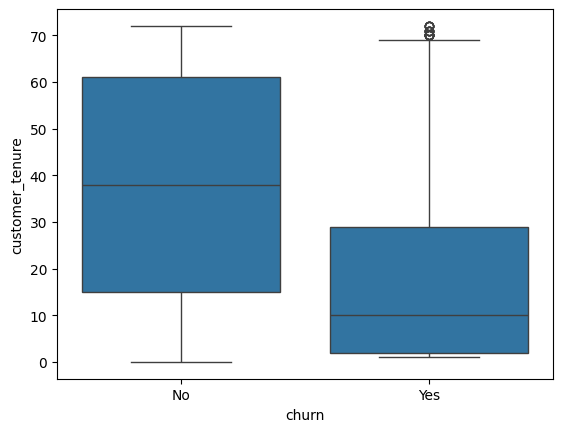

In [58]:
import seaborn as sns
sns.boxplot(x='churn', y='customer_tenure', data=df)

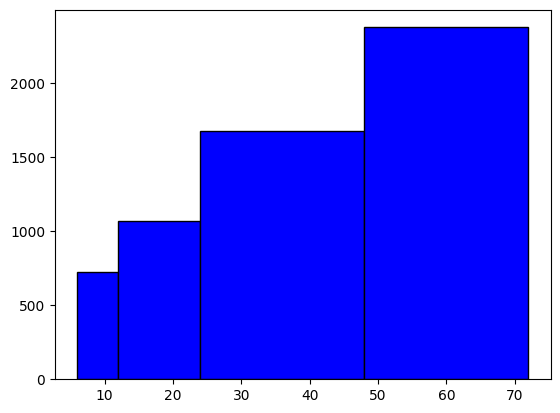

In [59]:
bins = [6, 12, 24, 48, 72]
plt.hist(df['customer_tenure'],
         bins=bins,
         edgecolor='black',
         color='blue',
         )
plt.show()

In [60]:
tenure_yes = df.loc[df['churn'] == 'Yes', 'customer_tenure']
tenure_no  = df.loc[df['churn'] == 'No',  'customer_tenure']


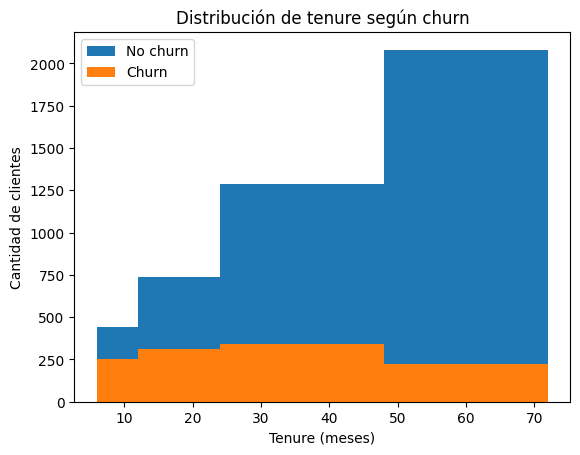

In [61]:
plt.hist(tenure_no, bins=bins, alpha=1, label='No churn')
plt.hist(tenure_yes, bins=bins, alpha=1, label='Churn')

plt.xlabel('Tenure (meses)')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de tenure según churn')
plt.legend()

plt.show()


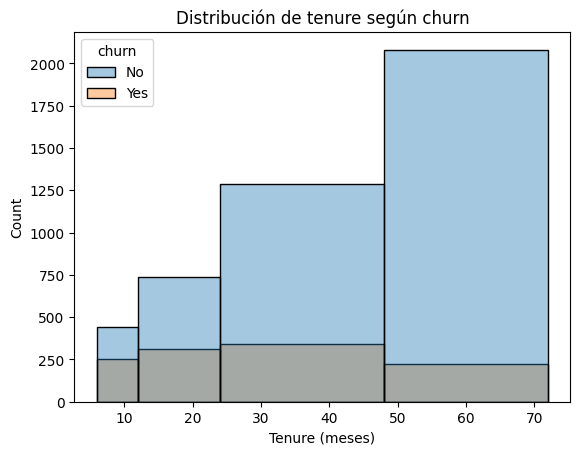

In [62]:
sns.histplot(
    data=df,
    x='customer_tenure',
    hue='churn',
    bins=bins,
    multiple='layer',
    alpha=0.4
)

plt.xlabel('Tenure (meses)')
plt.title('Distribución de tenure según churn')
plt.show()


In [63]:
df['tenure_group'] = pd.cut(
    df['customer_tenure'],
    bins=[0, 6, 12, 24, 48, 72])
df

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_phone_service,phone_multiple_lines,internet_internet_service,internet_online_security,internet_online_backup,internet_device_protection,internet_tech_support,internet_streaming_tv,internet_streaming_movies,account_contract,account_paperless_billing,account_payment_method,account_charges_monthly,account_charges_total,cuentas_diarias,tenure_group
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667,"(6, 12]"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667,"(6, 12]"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,"(0, 6]"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,"(12, 24]"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,"(0, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333,"(12, 24]"
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,"(12, 24]"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,"(0, 6]"
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667,"(48, 72]"


In [64]:
df_tenure_A = df['tenure_group'].value_counts().reset_index()
df_tenure_A.rename(columns={'count': 'total_customers'}, inplace=True)
df_tenure_A

,tenure_group,total_customers
0,"(48, 72]",2309
1,"(24, 48]",1648
2,"(0, 6]",1525
3,"(12, 24]",1045
4,"(6, 12]",729


In [65]:
df_tenure_B = df.groupby('tenure_group')['churn'].value_counts().reset_index()
df_tenure_B

/tmp/ipython-input-3650485247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tenure_B = df.groupby('tenure_group')['churn'].value_counts().reset_index()


,tenure_group,churn,count
0,"(0, 6]",Yes,784
1,"(0, 6]",No,686
2,"(6, 12]",No,452
3,"(6, 12]",Yes,253
4,"(12, 24]",No,730
5,"(12, 24]",Yes,294
6,"(24, 48]",No,1269
7,"(24, 48]",Yes,325
8,"(48, 72]",No,2026
9,"(48, 72]",Yes,213


In [66]:
df_tenure_B = df_tenure_B.loc[df_tenure_B['churn']=='Yes']
df_tenure_B.rename(columns={'count': 'churned_customers'}, inplace=True)
df_tenure_B

/tmp/ipython-input-2275855898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tenure_B.rename(columns={'count': 'churned_customers'}, inplace=True)


,tenure_group,churn,churned_customers
0,"(0, 6]",Yes,784
3,"(6, 12]",Yes,253
5,"(12, 24]",Yes,294
7,"(24, 48]",Yes,325
9,"(48, 72]",Yes,213


In [67]:
df_churn_rate = df_tenure_A.merge(
    df_tenure_B,
    on='tenure_group'
)
df_churn_rate['churn_rate']=(df_churn_rate['churned_customers']/df_churn_rate['total_customers']).multiply(100).round(2)
df_churn_rate

,tenure_group,total_customers,churn,churned_customers,churn_rate
0,"(48, 72]",2309,Yes,213,9.22
1,"(24, 48]",1648,Yes,325,19.72
2,"(0, 6]",1525,Yes,784,51.41
3,"(12, 24]",1045,Yes,294,28.13
4,"(6, 12]",729,Yes,253,34.71


charges Monthly

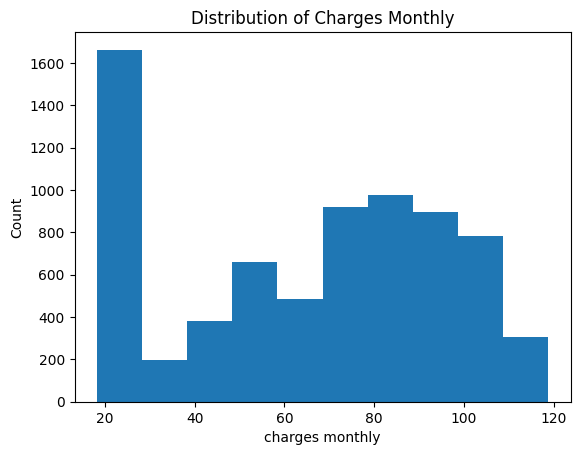

In [69]:
import matplotlib.pyplot as plt

plt.hist(df['account_charges_monthly'])
plt.xlabel('charges monthly')
plt.ylabel('Count')
plt.title('Distribution of Charges Monthly')
plt.show()

In [70]:
df['account_charges_monthly'].describe()

,account_charges_monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


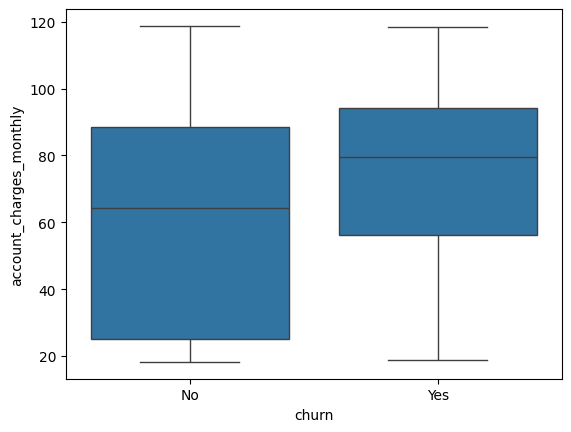

In [71]:
sns.boxplot(x='churn', y='account_charges_monthly', data=df);

In [73]:
df['account_charges_monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

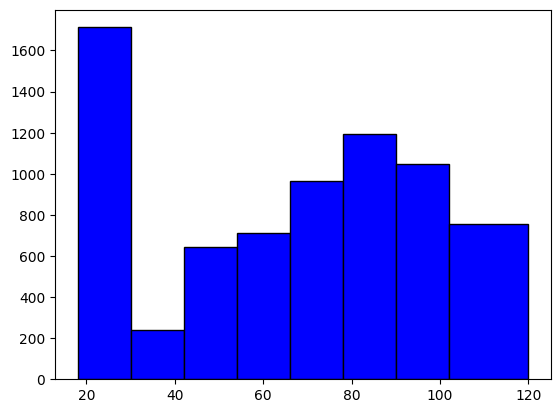

In [75]:
bins = [18, 30, 42, 54, 66, 78, 90, 102, 120]
plt.hist(df['account_charges_monthly'],
         bins=bins,
         edgecolor='black',
         color='blue',
         )
plt.show()

In [78]:
charges_monthly_yes = df.loc[df['churn'] == 'Yes', 'account_charges_monthly']
charges_monthly_no  = df.loc[df['churn'] == 'No',  'account_charges_monthly']

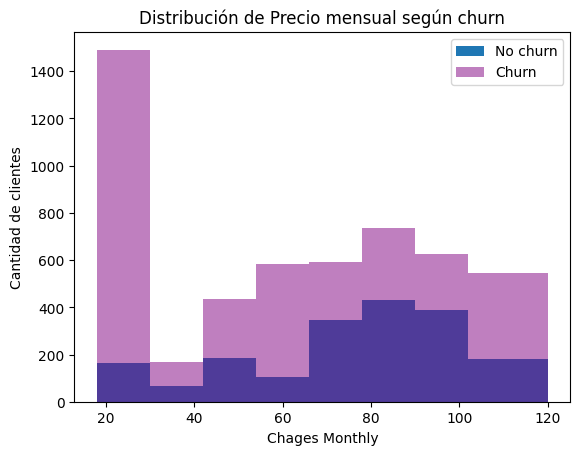

In [81]:
plt.hist(charges_monthly_yes, bins=bins, alpha=1, label='No churn')
plt.hist(charges_monthly_no, bins=bins, alpha=0.5, label='Churn', color='purple')

plt.xlabel('Chages Monthly')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de Precio mensual según churn')
plt.legend()

plt.show()

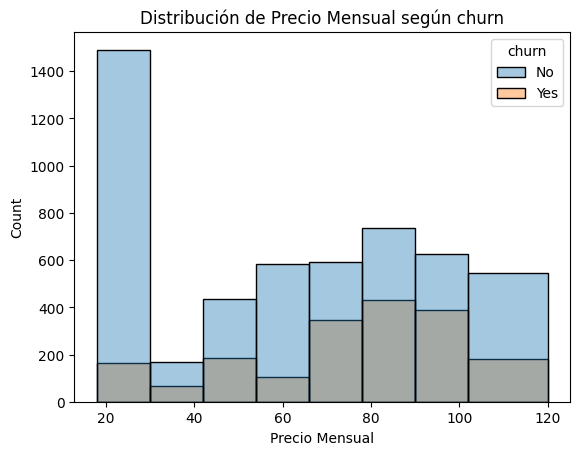

In [82]:
sns.histplot(
    data=df,
    x='account_charges_monthly',
    hue='churn',
    bins=bins,
    multiple='layer',
    alpha=0.4
)

plt.xlabel('Precio Mensual')
plt.title('Distribución de Precio Mensual según churn')
plt.show()

##📝 Reporte Final